Inspiration:
- [Berlin Marathons](https://medium.com/@moralescas/berlin-marathon-data-1974-2023-fd18f420906f)

Questions to be answered:
- **Olympic Marathon**
    - Which country won the most medals
- **NYC Marathon**
    - Difference between male and female times
    - Country with most winners
    - avg time per country
- **Berlin Marathon**
    - Where do most runners come from?
    - Where are the shortest times from?
    - Are these two places the same?
    - How did each country perform?
    - How have finishing times changed over the years?
    - How has the fastest time changed over the years?
- **Boston Marathon**:
    - how age affects race time
        - Fastest time per age group
    - difference in gender race times
- **Boston Marathon winners**:
    - Country with most winners
        - Show this on the map to show how geography can affect the outcomes
    - Avg time per country
    - Look at ¿avg? difference in time between men and women
- **Other**:
    - Does location of race affect times


Sources:
- [Berlin Marathon Data](https://www.kaggle.com/datasets/aiaiaidavid/berlin-marathons-data)
- [NYC Marathons](https://www.openintro.org/data/index.php?data=nyc_marathon)
- [Boston Marathon Data](https://data.scorenetwork.org/running/boston_marathon_2023.html)
- [Boston Marathon Winners Data](https://www.kaggle.com/datasets/zhikchen/boston-marathon-winners-men-and-women)

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pn.extension('tabulator')

import hvplot.pandas

In [27]:
#files
#format: year, name, country, time, time_hrs, division[sex], note
#(only winners)
nyc_marathon = pd.read_csv('1_running_datasets/nyc_marathon.csv')

#format: year, location, Gold_Name, Gold_Country, Silver_Name, Silver_Country, Bronze_Name, Bronze_Country
#(only winners)
olympic_marathon = pd.read_csv('1_running_datasets/Olympic_Games.csv').drop(columns='Unnamed: 0')

#format: country, Gold, Silver, Bronze, Total
#(only winners)
olympic_country_medals = pd.read_csv('1_running_datasets/Olympic_Country_Medals.csv')

#format: year, country, gender, age, time
#(all participants)
berlin_marathon = pd.read_csv('1_running_datasets/berlin_marathon_1974_2023.csv')

#format: age_group, place_overall, place_gender, place_division, name, team, bib_number, half_time, finish_net, finish_gun, gender, half_time_sec, finish_net_sec, finish_gun_sec, finish_net_,minutes
#new format: name, age_group, place_gender, finish_net, finish_net_sed, finish_net_hour
#(all participants)(no country)
boston_marathon_2023 = pd.read_csv('1_running_datasets/boston_marathon_2023.csv')[['name', 'age_group', 'place_gender', 'finish_net', 'finish_net_sec']]
boston_marathon_2023['finish_net_hour'] = boston_marathon_2023['finish_net_sec']/3600
boston_marathon_2023

#format: Year, Winner, Country, Time, Distance(Miles), Distance(KM)
mens_boston_marathon_winners = pd.read_csv('1_running_datasets/Mens_Boston_Marathon_Winners.csv')
womens_boston_marathon_winners = pd.read_csv('1_running_datasets/Womens_Boston_Marathon_Winners.csv')

/var/folders/_p/y56kr6vs1fz7ycsbxhyqwwwc0000gn/T/ipykernel_51334/3334841572.py:16: DtypeWarning:

Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [28]:
nyc_marathon_men = nyc_marathon.loc[nyc_marathon['division'] == 'Men']
nyc_marathon_women = nyc_marathon.loc[nyc_marathon['division'] == 'Women']

In [29]:
fig = px.histogram(nyc_marathon, x = 'country', 
             color = 'division',
             title = 'NYC Marathon',
             category_orders={'country': nyc_marathon['country'].value_counts().index},
             template='plotly_dark',
             labels = {'country':'Country', 'count': 'Number of Winners'},
            )
fig.update_yaxes(title_text='Number of Winners')


<Axes: xlabel='year'>

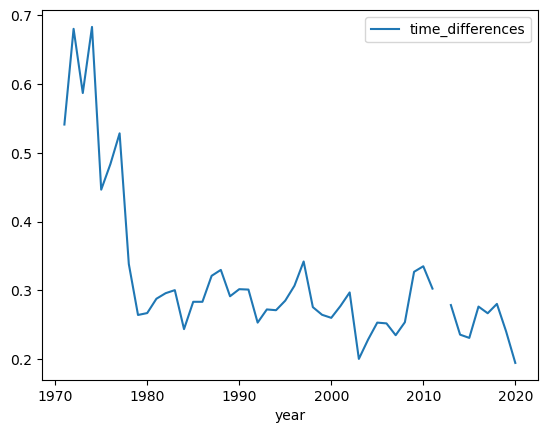

In [45]:
nyc_df_mf = pd.merge(nyc_marathon_men, nyc_marathon_women, on = ['year'], suffixes=('_men', '_women'))

time_differences = pd.DataFrame()
time_differences['year'] = nyc_df_mf['year']
time_differences['time_differences'] = nyc_df_mf['time_hrs_women'] - nyc_df_mf['time_hrs_men']
time_differences.plot(x = 'year', y = 'time_differences')

In [72]:
fig = px.line(nyc_df_mf, x = 'year', y = ['time_hrs_men', 'time_hrs_women'])
fig.update_yaxes(title_text='Time (hrs)')




In [73]:
fig = px.line(nyc_df_mf, x = 'year', y = 'time_differences')
fig.update_yaxes(title_text='Time (hrs)')
